In [138]:
from sklearn.datasets import load_iris
iris = load_iris()

In [139]:
import pandas as pd

df = pd.DataFrame(iris["data"], columns=iris['feature_names'])
df['target'] = iris['target']

In [140]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


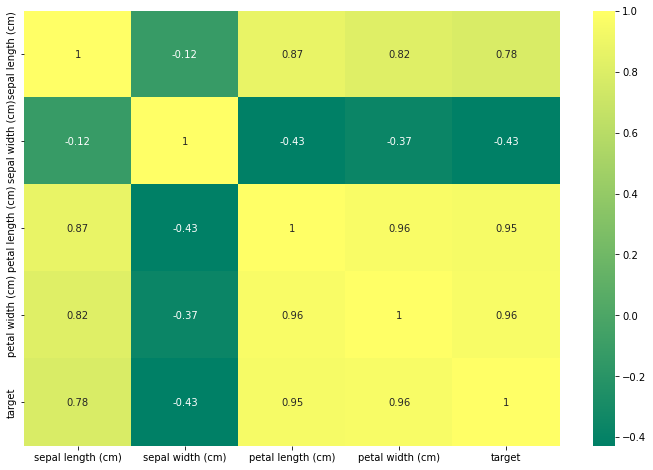

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.astype("float").corr(), cmap="summer", annot=True)

In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)
# print(x_train, x_test, y_train, y_test)

In [143]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

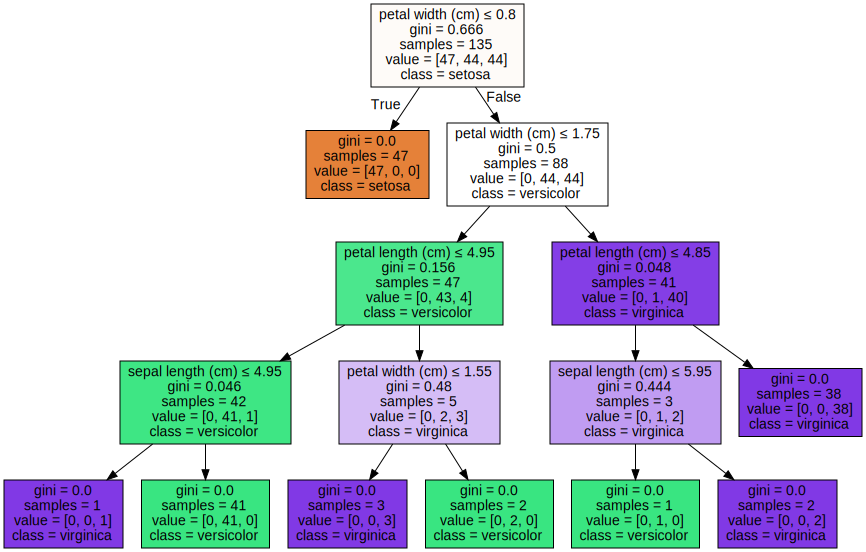

In [144]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"], class_names=iris["target_names"], 
                    filled=True, special_characters=True)

graph = graphviz.Source(g)
graph

In [145]:
pre = clf.predict(x_test)
print("target:", list(y_test))
print("預測結果:", list(pre))

target: [1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1]
預測結果: [1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1]


In [146]:
from sklearn.metrics import accuracy_score

rate = accuracy_score(pre, y_test)
print("分類準確率:", rate)

分類準確率: 0.8666666666666667


In [147]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pre)
pd.DataFrame(cm)

,0,1,2
0,3,0,0
1,0,5,1
2,0,1,5
